<a href="https://colab.research.google.com/github/waghpallavi/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Bike Sharing Demand Prediction
---


**Project Type**- Regression

**Contribution**- Team

**Team Name**- Insider

**Team Member 1**- Chetan Prakash

**Team Member 2**- Pallavi Wagh

**Team Member 3**- Kaushik Dey

**Team Member 4**- Hrushikesh Rajesh Dharamthok

**Team Member 5**- Prabhat Rajput

# **Project Summary -**
---

Seoul city locals can rent bicycles for a charge and for a set period of time. However, the demand for motorbikes varies according to various variables, and they cannot keep up. Our approach aims to estimate demand for rented bikes at any given time, considering all factors that will assist in regulating the flow of motorbikes. Rental bikes are already available in numerous urban locations to increase transit convenience. It is critical that the rental bikes are accessible and available to the general public at the proper time since this eliminates waiting. Maintaining a consistent supply of rental bikes for the city eventually emerges as a major issue. The ability to estimate the number of bikes needed each hour is essential.
We are going to explore the machine learning algorithms which function effectively with the data and the factors that have a significant impact on the demand for rented bikes.

# **GitHub Link -**
---
Chetan Prakash - https://github.com/Chetan1207/ML-Regression-Bike-Sharing-Prediction.git

Pallavi Wagh - https://github.com/waghpallavi/Bike-Sharing-Demand-Prediction.git

Kaushik Dey - https://github.com/Kaushik0908/Seoul_Bike-Sharing-Demand

Hrushikesh Rajesh Dharamthok- https://github.com/Hrushi360/ML-Regression-Bike-Sharing-Prediction

Prabhat Rajput - https://github.com/PrabhatRajput001/Bike-Sharing-Demand-Prediction.git

# **Problem Statement**
---


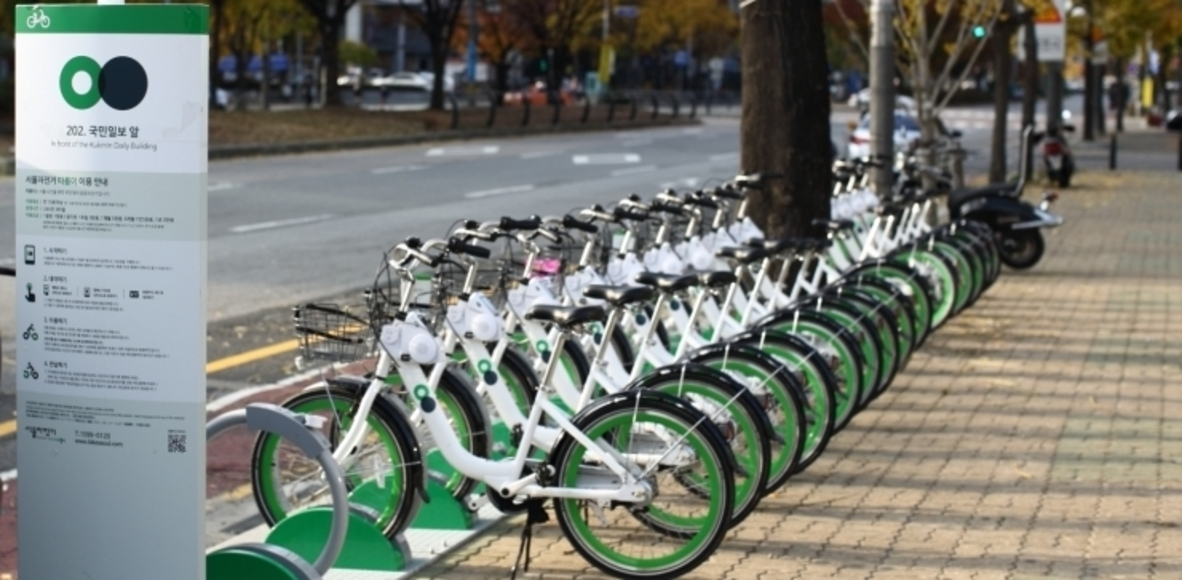

Currently, many large cities have accepted the usage of rental bikes to enhance the comfort of mobility. Since it reduces waiting, it is essential to make rental bikes accessible and available to the general public at the proper time. A consistent supply of rental bikes for the city eventually becomes a primary issue. It's crucial to estimate how many bikes will be required each hour in order to keep the supply of rental bikes stable.

# **Define Your Business Objective?**
---

The demand for bike-sharing services is predicted using previous data by the bike-sharing demand prediction regression database in order to optimize fleet management, personnel, and pricing methods. This enables bike-sharing companies to deploy resources wisely, improving operational performance and profitability, based on user behavior and demand patterns.
The demand prediction regression database for bike sharing's overarching goal is to provide bike-sharing companies with knowledge about consumer behavior and demand patterns in order to help them improve the efficiency and profitability of their operations.

# ***Let's Begin !***

## ***1. Know Your Data***
---

# **Import Libraries**
---

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from numpy import math
from sklearn.metrics import accuracy_score, auc
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
import warnings
warnings.filterwarnings('ignore')


# **Dataset Loading**
---

In [2]:
# Load Dataset
from google.colab import drive
drive.mount=('/content/drive')

In [3]:
!pip install --upgrade google-auth
!pip install --upgrade google-auth-oauthlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.2/178.2 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.17.2
    Uninstalling google-auth-2.17.2:
      Successfully uninstalled google-auth-2.17.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset First View
---

In [4]:
# Dataset First Look
file_path=('/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone project/Regression Bike Sharing Demand Prediction/SeoulBikeData.csv') 
df = pd.read_csv(file_path, encoding= 'unicode_escape')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
row_count = len(df)
row_count

8760

In [7]:
column_count = len(df.columns)
column_count

14

In [8]:
# Information regarding type of columns present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

we have 10 numerical and 4 categorical type columns.

In [9]:
df.shape

(8760, 14)

In [10]:
# Name all the columns present in dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Describe all the points
df.describe(include='all') 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


# Checking the Null and Duplicate values 
---

In [12]:
# Missing Values/Null Values Count
df.isnull().sum() 

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [13]:
# Checking for the duplicate values
len(df[df.duplicated()])

0

As we can see, the dataset has no null or duplicate values.

# **Data Description** 
---


The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

*   **Date :** year-month-day
*   **Rented Bike count -** Count of bikes rented at each hour
*   **Hour -** Hour of he day
*   **Temperature-**Temperature in Celsius
*   **Humidity -** %
*   **Windspeed -** m/s
*   **Visibility -** 10m
*   **Dew point temperature -** Celsius
*   **Solar radiation -** MJ/m2
*   **Rainfall -** mm
*   **Snowfall -** cm
*   **Seasons -** Winter, Spring, Summer, Autumn
*   **Holiday -** Holiday/No holiday
*   **Functional Day -** NoFunc(Non Functional Hours), Fun(Functional hours)

# Finding the Insights

<Axes: >

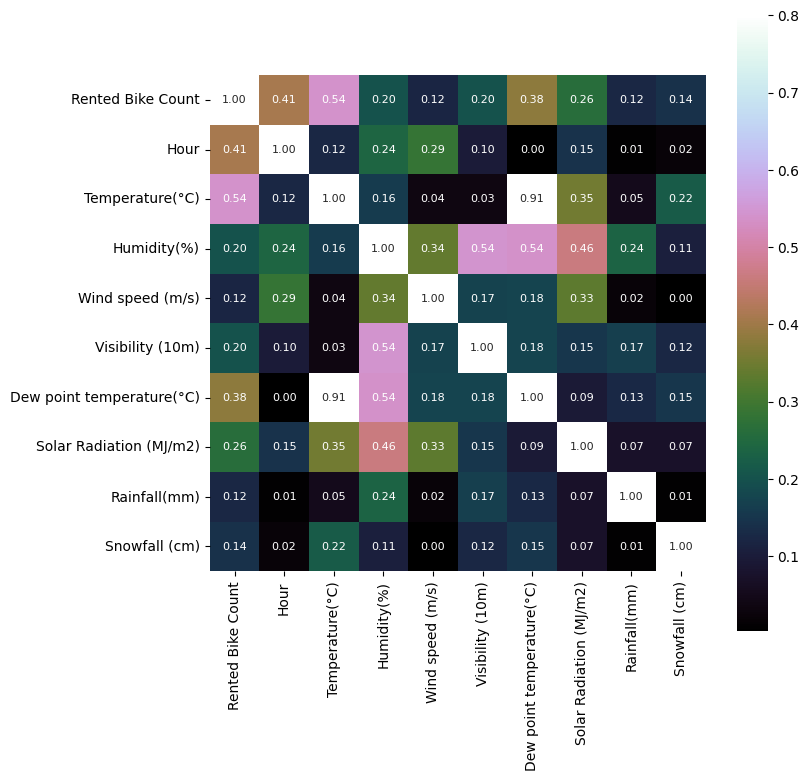

In [14]:
# Correlation between all the numerical data
plt.figure(figsize=(8,8))
correlation = df.corr()
sns.heatmap(abs(correlation),annot = True, fmt='.2f', annot_kws={'size': 8},  vmax=.8, square=True, cmap="cubehelix")

So we can see that there are collinearity present in between Dew Point temperature and Temperature(value=0.91), so we have to remove it because it affect the accuracy of the model.

In [15]:
# Rename the temperature and Dew Temperature name
df.rename(columns={'Temperature(°C)':'Temperature in degree celsius', 'Dew point temperature(°C)':'Dew point temperature in degree celsius'}, inplace=True)

In [16]:
# creating new feature to remove multicollinearity
df['dew_point']=(df['Temperature in degree celsius']-df['Dew point temperature in degree celsius'])
df.drop('Temperature in degree celsius', axis=1, inplace=True) # dropping the original column
df.drop('Dew point temperature in degree celsius', axis=1, inplace=True) # dropping the original column
print(df['dew_point'])

0       12.4
1       12.1
2       11.7
3       11.4
4       12.6
        ... 
8755    14.5
8756    13.3
8757    12.5
8758    11.9
8759    11.2
Name: dew_point, Length: 8760, dtype: float64


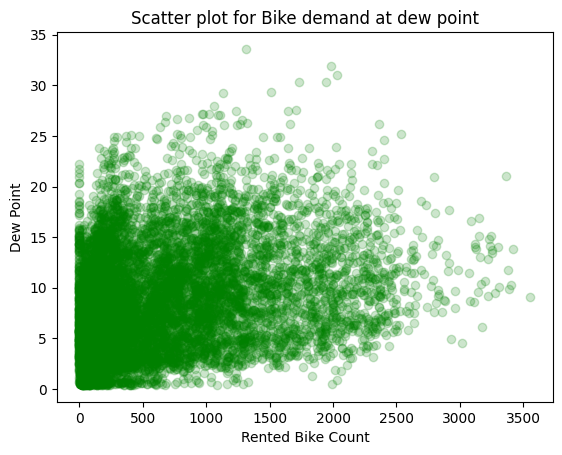

In [17]:
# draw a scatter plot for checking multicollinearity
plt.scatter(df['Rented Bike Count'], df['dew_point'], alpha=0.2, color='green')
plt.title('Scatter plot for Bike demand at dew point')
plt.xlabel('Rented Bike Count')
plt.ylabel('Dew Point')
plt.show()

<Axes: >

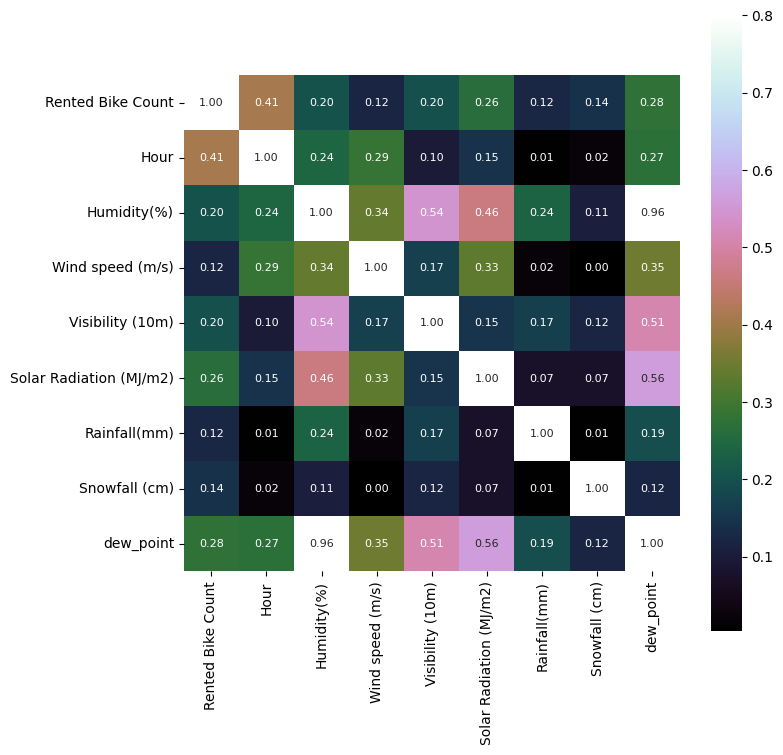

In [18]:
# Again checking the correlation between all the numerical data
plt.figure(figsize=(8,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, fmt='.2f', annot_kws={'size': 8},  vmax=.8, square=True, cmap="cubehelix")

##### 1. Why did you pick the specific chart?

*   To identify potential links between variables and evaluate the degree of these correlations. 
*   The scatter plot's aim is to show what happens to one variable when another variable is modified. The scatter plot is used for testing a theory about the two variables of the test.



##### 2. What is/are the insight(s) found from the chart?

 we can see there is high multicollinearity generate between dew point and Humidity. So we have to remove it for better model.

In [19]:
df.drop('Humidity(%)', axis=1, inplace=True) # remove Humidity beacuse of high relation between independent variable

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

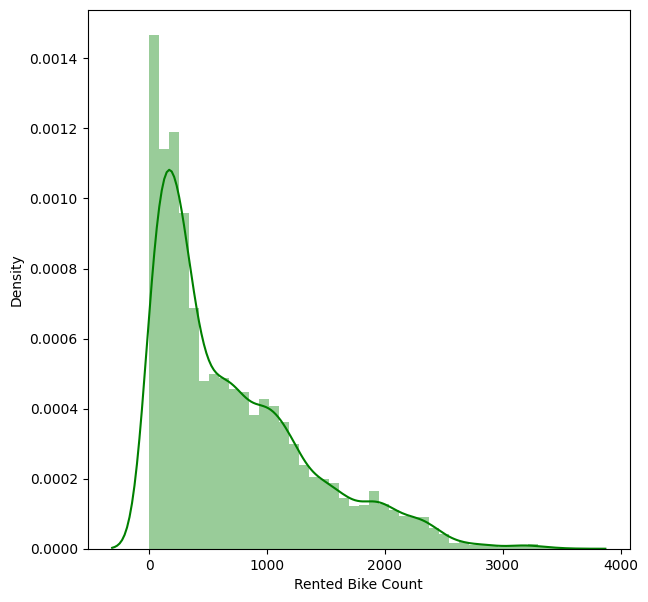

In [20]:
# Draw density chart to check distribution of the Data and our Dependent variable is 'Rental Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="g")

We can se high Skewness. So we try to cover it.



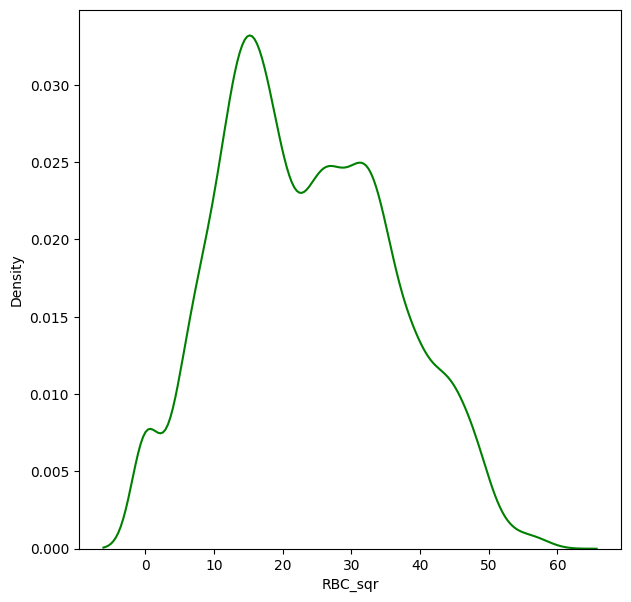

In [21]:
# try to make normal distribution of the data with the square root method
df['RBC_sqr']=np.sqrt(df['Rented Bike Count'])
plt.figure(figsize=(7,7))
sns.kdeplot(df['RBC_sqr'], color='Green')
plt.show()

We use square root method because when we try with log10 it create error that data tends to infinity because coulmn have some negative or 0 value present in it.

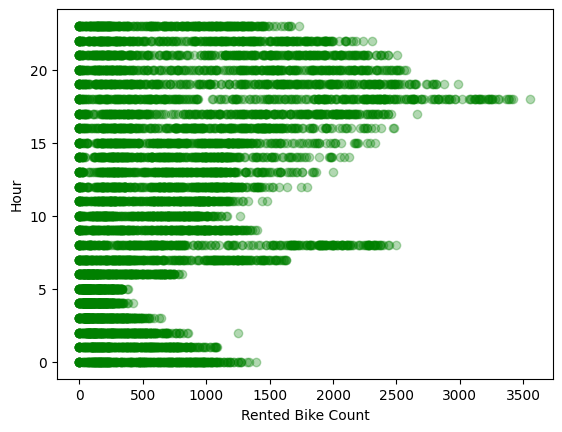

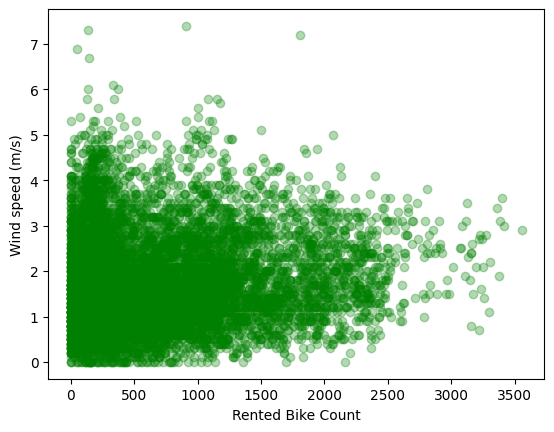

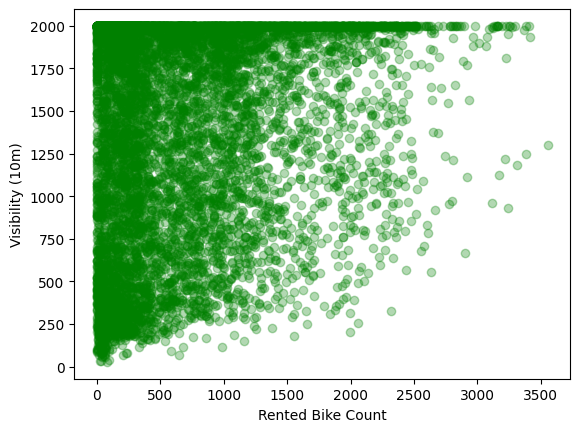

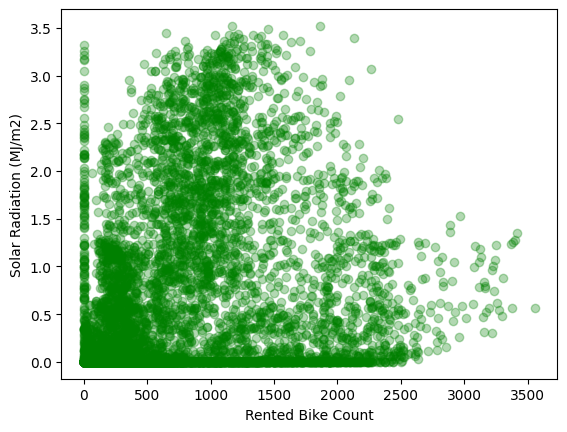

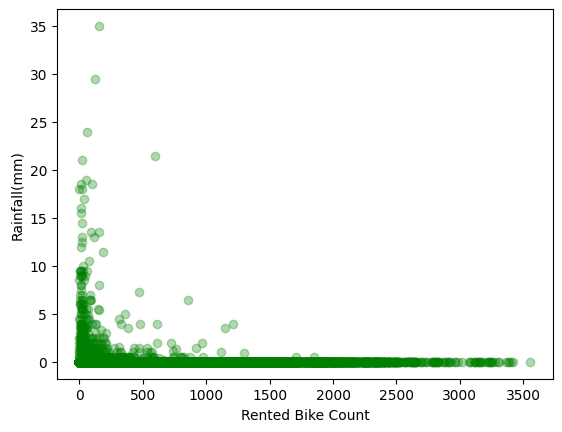

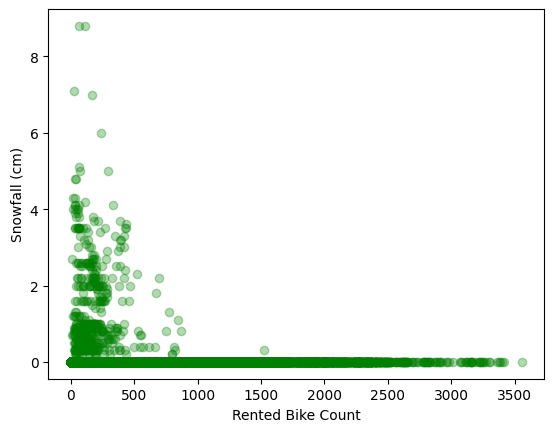

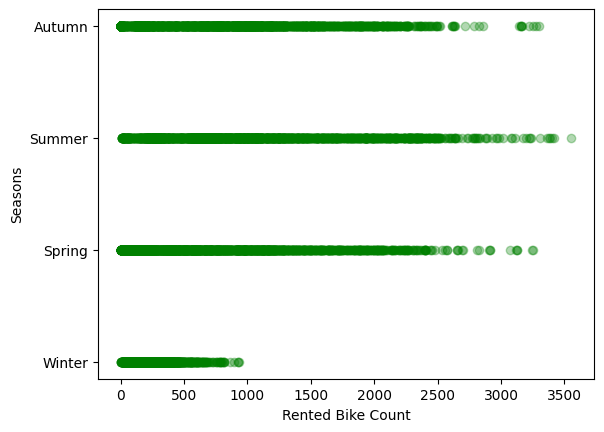

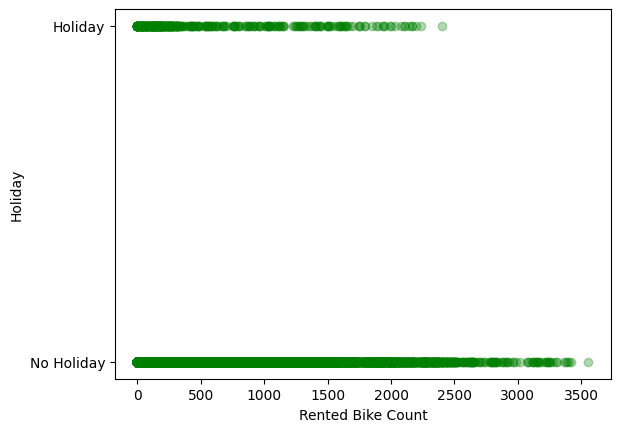

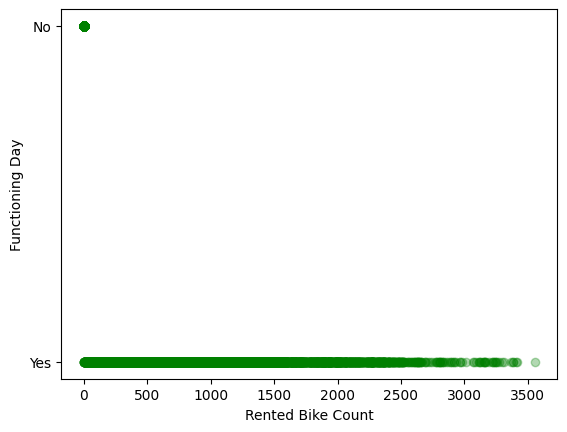

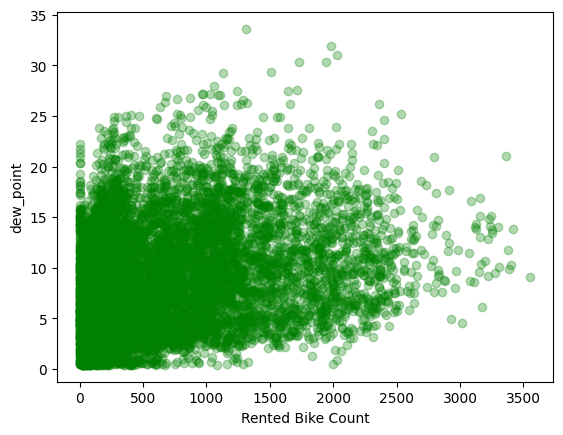

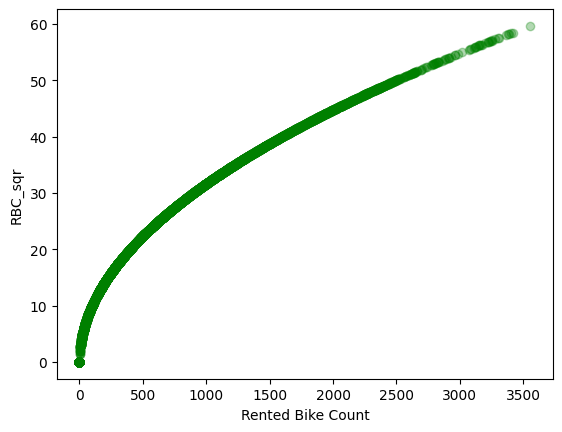

In [22]:
# Function to show the realtion between all the independent variable to dependent variable
def relation(independent_variable, other_variables, dataframe):
    for col in other_variables:
        plt.scatter(dataframe[independent_variable], dataframe[col], alpha=0.3, color='green')
        plt.xlabel(independent_variable)
        plt.ylabel(col)
        plt.show()
other_variables = df.columns[2:].tolist() # select columns 1-10 as other variables
independent_variable = 'Rented Bike Count'

relation(independent_variable, other_variables, df)


##### 1. Why did you pick the specific chart?



*   Distribution plots evaluate the distribution of sample data graphically by comparing the actual distribution of the data to the theoretical values predicted provided a specific distribution.
*   The scatter plot's aim is to show what happens to one variable when another variable is modified. The scatter plot is used for testing a theory about the two variables of the test.



##### 2. What is/are the insight(s) found from the chart?



1.   We can see that there is no pattern between hour and bike count. People can take bike at any time.

1.   We can see that mostly bike are demanded 20 to 85 percent humidity.
2.   We can see that mostly bike demand when speed of wind is low.

1.   In visibility we can not have a clear pattern but we can say that people generally bike demand when visibility is high.

1.   Generally bike demand is low in high solar radiation.
2.   People rent bike when rain is very low.

1.   Negligible bike demand in snowfall.

1.   Bike demand is generally Autumn, Summer and Spring have same demand but in Winter bike demand is very low.
2.   Bike demand is high on 'no holiday' day and low on 'holiday'.

1.   We have negligible demand on 'No function' day.

1.   Mostly bike demand is between 0 to 20.






By these chart we can analyse that most suitable time for business growth i.e. at which time we have to focus more to increase our profit.










#####3. Will the gained insights help creating a positive business impact?

Yes, the knowledge we have obtained may be very helpful in helping a bike rental company make a profit. The business may make data-driven decisions to improve operations and boost profitability by understanding patterns in bike demand depending on weather and other factors.

In [23]:
df1=df.copy() # make copy of original dataset so it does not affect

In [24]:
# Split Date column"-
df1['Date']=pd.to_datetime(df1['Date'])
df1['year'] = df1['Date'].dt.year
df1['month'] = df1['Date'].dt.month
df1['day'] = df1['Date'].dt.day
df1.drop('Date', axis=1, inplace=True)   # drop original date column

In [25]:
# making groups of Month and demand
peak_month = df1.groupby(['month'])['Rented Bike Count'].sum().reset_index()
peak_month_sorted = peak_month.sort_values('Rented Bike Count', ascending=False)  # sorted according to Rented Bike Count
print(peak_month_sorted)

    month  Rented Bike Count
5       6             706728
6       7             691339
4       5             665948
9      10             626988
7       8             614190
3       4             556219
8       9             499326
10     11             493412
2       3             455037
11     12             311771
0       1             287244
1       2             264112


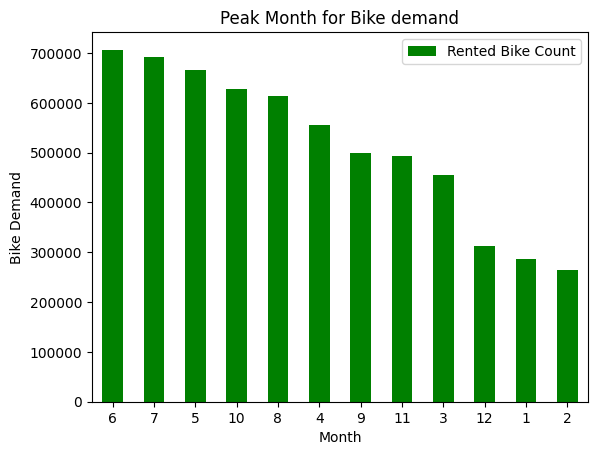

In [26]:
# Bar chart for showing peak month for bike demand
peak_month_sorted.plot.bar('month', 'Rented Bike Count', rot=0, color='green')
plt.title('Peak Month for Bike demand')
plt.xlabel('Month')
plt.ylabel('Bike Demand')
plt.show()


We can see that sixth month have highest demand.

Text(0, 0.5, 'Total number of rental bikes')

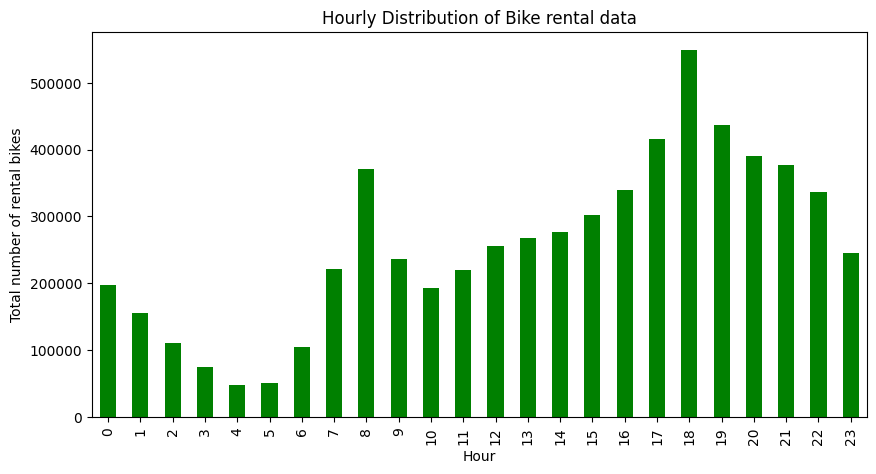

In [27]:
per_hour_demand=df.groupby(['Hour'])['Rented Bike Count'].sum().plot(kind='bar', figsize=(10,5), color='green')
plt.title("Hourly Distribution of Bike rental data")
plt.ylabel("Total number of rental bikes")

In [28]:
# Naming all the numerical columns present in dataset
num_col=df.describe().columns 
num_col

Index(['Rented Bike Count', 'Hour', 'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'dew_point',
       'RBC_sqr'],
      dtype='object')

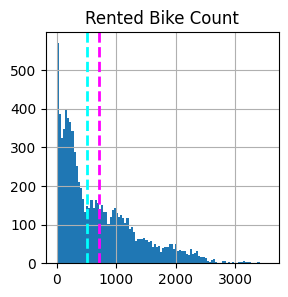

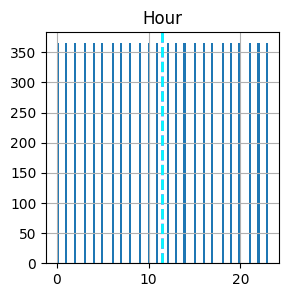

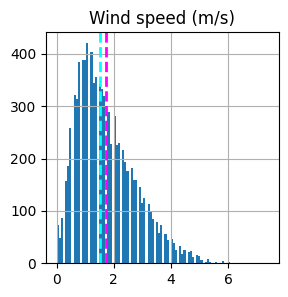

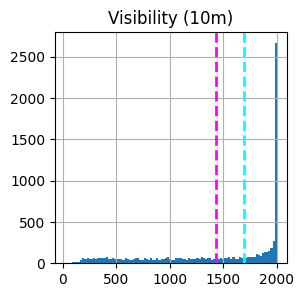

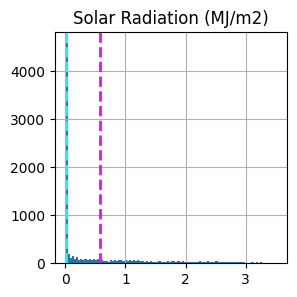

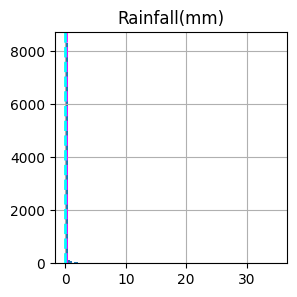

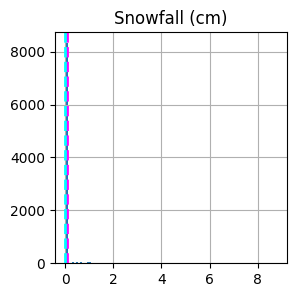

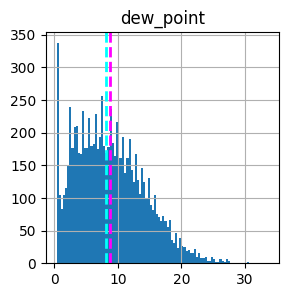

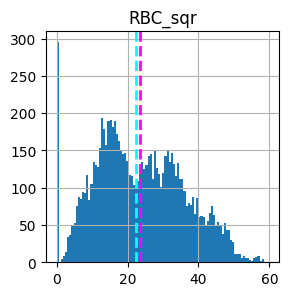

In [29]:
for column in num_col[:]: # this chart shows the mean and median of each numeric values
   fig = plt.figure(figsize=(5, 5) )
   ax = fig.gca()
   feature = df[column]
   feature.hist(bins=100, ax = ax)
   ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
   ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
   ax.set_title(column)
plt.show()

##### 1. Why did you pick the specific chart?



   Bar graphs provide a visual representation of data. They are used to show the relationship between two or more different types of data visually. To make the large amount of information easier to interpret visually, it is summarized in a bar graph. It offers a more detailed explanation of the patterns of the data than the table. It helps in quickly estimating the important values.




##### 2. What is/are the insight(s) found from the chart?



1.   The highest demand is in the sixth month.
2.   The peak hour for demand for bikes is at eighteen.
3.   Calculating the mean and median lets us understand the data's basic trends and distribution of numerical values, which informs decision-making and analysis.





#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying the biggest demand month and peak hour for bike rental demand may absolutely assist make a beneficial company effect. A bike rental company may use this data to optimize its inventory levels, personnel, and pricing strategies in order to better fulfill consumer demand and generate income.

# **Data Pre-Processing**
---

In [30]:
# Dummification of all the objective rows:-
df1['working_day']=np.where(df1['Functioning Day']=='Yes', 1, 0)
df1['working_day']=np.where(df1['Functioning Day']=='No', 1, 0)
df1['well_seasoned']=np.where(df1['Seasons']=='Autumn', 1, 0)
df1['well_seasoned']=np.where(df1['Seasons']=='Summer', 1, 0)
df1['well_seasoned']=np.where(df1['Seasons']=='Spring', 1, 0)
df1['well_seasoned']=np.where(df1['Seasons']=='Winter', 1, 0)
df1['day_off']=np.where(df1['Holiday']=='Holiday', 1, 0)
df1['day_off']=np.where(df1['Holiday']=='No Holiday', 1, 0)

In [31]:
# Droping the original columns
df1.drop(columns=['Functioning Day'], axis=1, inplace=True)
df1.drop(columns=['Seasons'], axis=1, inplace=True)
df1.drop(columns=['Holiday'], axis=1, inplace=True)
df1.head(5)

,Rented Bike Count,Hour,Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),dew_point,RBC_sqr,year,month,day,working_day,well_seasoned,day_off
0,254,0,2.2,2000,0.0,0.0,0.0,12.4,15.937377,2017,1,12,0,1,1
1,204,1,0.8,2000,0.0,0.0,0.0,12.1,14.282857,2017,1,12,0,1,1
2,173,2,1.0,2000,0.0,0.0,0.0,11.7,13.152946,2017,1,12,0,1,1
3,107,3,0.9,2000,0.0,0.0,0.0,11.4,10.344080,2017,1,12,0,1,1
4,78,4,2.3,2000,0.0,0.0,0.0,12.6,8.831761,2017,1,12,0,1,1


In [32]:
# Make list for independent variable
dependent_variable= 'Rented Bike Count'
independent_variable=list(set(df1.columns.tolist()) - {dependent_variable})
independent_variable

['Hour',
 'Snowfall (cm)',
 'RBC_sqr',
 'Visibility (10m)',
 'working_day',
 'Solar Radiation (MJ/m2)',
 'dew_point',
 'Rainfall(mm)',
 'well_seasoned',
 'month',
 'year',
 'day',
 'Wind speed (m/s)',
 'day_off']

In [33]:
# Create the data of independent variables
X = df1[independent_variable].values

# Create the dependent variable data
y = df1[dependent_variable].values

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0) # Splitting data into train and test model with ratio(70:30)

In [35]:
X_train[:5]   # checking the values

array([[1.50000000e+01, 0.00000000e+00, 1.76635217e+01, 2.91000000e+02,
        0.00000000e+00, 1.22000000e+00, 6.90000000e+00, 0.00000000e+00,
        1.00000000e+00, 2.00000000e+00, 2.01800000e+03, 2.30000000e+01,
        6.00000000e-01, 1.00000000e+00],
       [1.80000000e+01, 0.00000000e+00, 5.32541078e+01, 2.00000000e+03,
        0.00000000e+00, 8.40000000e-01, 9.40000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.00000000e+00, 2.01800000e+03, 3.10000000e+01,
        2.40000000e+00, 1.00000000e+00],
       [1.10000000e+01, 0.00000000e+00, 2.66645833e+01, 1.99200000e+03,
        0.00000000e+00, 8.80000000e-01, 9.50000000e+00, 1.00000000e-01,
        0.00000000e+00, 8.00000000e+00, 2.01800000e+03, 2.30000000e+01,
        1.70000000e+00, 1.00000000e+00],
       [1.00000000e+01, 0.00000000e+00, 2.74954542e+01, 1.74900000e+03,
        0.00000000e+00, 2.20000000e+00, 1.78000000e+01, 0.00000000e+00,
        0.00000000e+00, 4.00000000e+00, 2.01800000e+03, 2.50000000e+01,
        6.000

In [36]:
X_train[:5]   # checking the values

array([[1.50000000e+01, 0.00000000e+00, 1.76635217e+01, 2.91000000e+02,
        0.00000000e+00, 1.22000000e+00, 6.90000000e+00, 0.00000000e+00,
        1.00000000e+00, 2.00000000e+00, 2.01800000e+03, 2.30000000e+01,
        6.00000000e-01, 1.00000000e+00],
       [1.80000000e+01, 0.00000000e+00, 5.32541078e+01, 2.00000000e+03,
        0.00000000e+00, 8.40000000e-01, 9.40000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.00000000e+00, 2.01800000e+03, 3.10000000e+01,
        2.40000000e+00, 1.00000000e+00],
       [1.10000000e+01, 0.00000000e+00, 2.66645833e+01, 1.99200000e+03,
        0.00000000e+00, 8.80000000e-01, 9.50000000e+00, 1.00000000e-01,
        0.00000000e+00, 8.00000000e+00, 2.01800000e+03, 2.30000000e+01,
        1.70000000e+00, 1.00000000e+00],
       [1.00000000e+01, 0.00000000e+00, 2.74954542e+01, 1.74900000e+03,
        0.00000000e+00, 2.20000000e+00, 1.78000000e+01, 0.00000000e+00,
        0.00000000e+00, 4.00000000e+00, 2.01800000e+03, 2.50000000e+01,
        6.000

# **Model Fitting**

---



In [37]:
# create function to fit the data into t
def frame(model, X_train, X_test, y_train, y_test):
    
    # Model fitting
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Draw a line chart for showing the difference between actual and predicted value
    y_actual=y_test
    y_pred=model.predict(X_test)
    plt.plot(y_actual, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Observation')
    plt.ylabel('Target')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

  # Calculate evaluation metrics
    metrics = {}
    metrics['MSE_train'] = mean_squared_error(y_train, y_pred_train)
    metrics['MSE_test'] = mean_squared_error(y_test, y_pred_test)
    metrics['RMSE_train'] = np.sqrt(metrics['MSE_train'])
    metrics['RMSE_test'] = np.sqrt(metrics['MSE_test'])
    metrics['MAE_train'] = mean_absolute_error(y_train, y_pred_train)
    metrics['MAE_test'] = mean_absolute_error(y_test, y_pred_test)
    metrics['R2_train'] = r2_score(y_train, y_pred_train)
    metrics['R2_test'] = r2_score(y_test, y_pred_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = 1 - ((1 - metrics['R2_test']) * (n - 1)) / (n - p - 1)
    metrics['Adj_R2_test'] = adj_r2
   # Print evaluation metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
        
    
    return model


# Linear Regression

---





In [38]:
# Scaling the data,Transforming data:-
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.13043478, 0.        , 0.29998125, ..., 0.6       , 0.17567568,
        1.        ],
       [0.08695652, 0.        , 0.40386212, ..., 0.46666667, 0.13513514,
        1.        ],
       [0.73913043, 0.04545455, 0.25210029, ..., 0.36666667, 0.58108108,
        1.        ],
       ...,
       [0.        , 0.        , 0.24474224, ..., 0.76666667, 0.17567568,
        1.        ],
       [0.95652174, 0.        , 0.61179814, ..., 0.6       , 0.22972973,
        1.        ],
       [0.        , 0.        , 0.46924538, ..., 0.6       , 0.2027027 ,
        1.        ]])

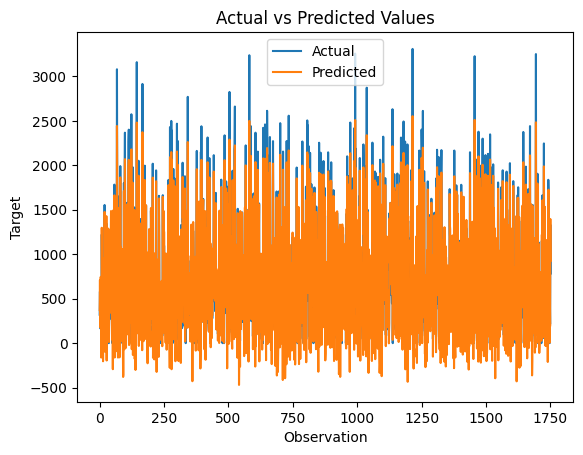

MSE_train: 19556.520507144283
MSE_test: 19327.624491282662
RMSE_train: 139.84462988311094
RMSE_test: 139.0238270631429
MAE_train: 106.05369829711489
MAE_test: 104.90681234271636
R2_train: 0.9529034335678972
R2_test: 0.9538193994196074
Adj_R2_test: 0.9534471896279404


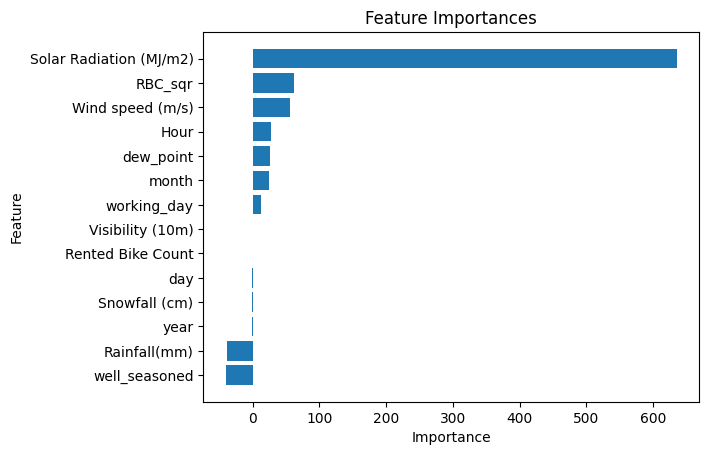

In [39]:
# Fitting Linear Regression Model

regression = LinearRegression()
frame(regression, X_train, X_test, y_train, y_test)
columns_list=df1.columns.tolist() # to make a columns array
# Get the feature importances
importances = regression.coef_
# Sort the features by importance
location = importances.argsort()
    
# Plot the feature importances
plt.barh(range(len(location)), importances[location])
plt.yticks(range(len(location)), [columns_list[i] for i in location])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()





# Lasso Regression with cross validation method

---



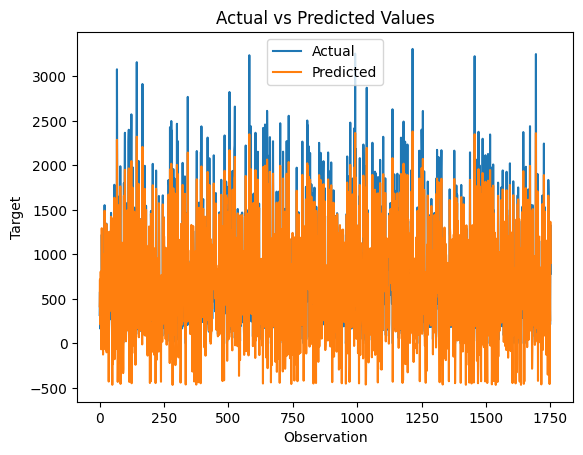

MSE_train: 30159.86998258786
MSE_test: 31617.398037689007
RMSE_train: 173.6659724372851
RMSE_test: 177.81281741676838
MAE_train: 132.27699124272735
MAE_test: 134.64985371828934
R2_train: 0.9273681471251682
R2_test: 0.9244547393380723
Adj_R2_test: 0.9238458541053337


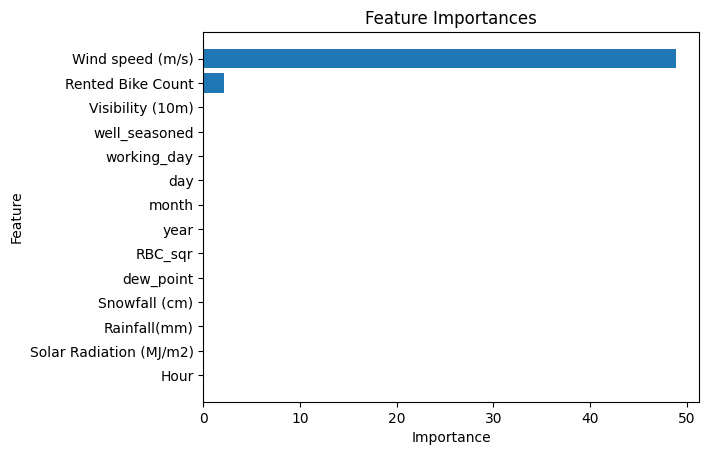

In [40]:
# Using Lasso regressor with Cross Validation
lasso_cv = LassoCV(cv=3, random_state=1)
frame(lasso_cv, X_train, X_test, y_train, y_test)    # fit the LassoCV object to the data
# Get the feature importances
importances2 = lasso_cv.coef_
# Sort the features by importance
location = importances2.argsort()
    
# Plot the feature importances
plt.barh(range(len(location)), importances2[location])
plt.yticks(range(len(location)), [columns_list[i] for i in location])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Ridge Regression with cross-validation

---



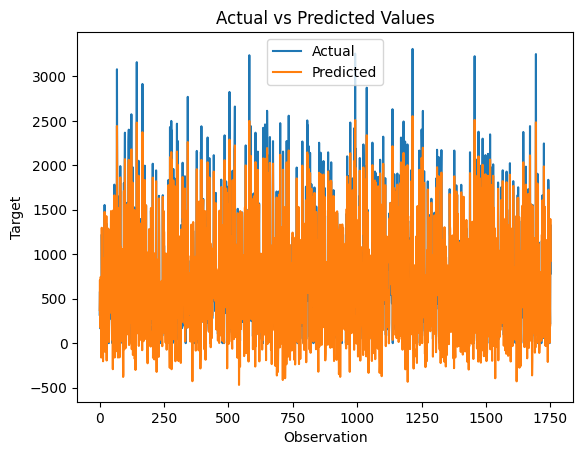

MSE_train: 19556.524328362404
MSE_test: 19327.689894735162
RMSE_train: 139.84464354548015
RMSE_test: 139.02406228683998
MAE_train: 106.05539358603265
MAE_test: 104.9072435937314
R2_train: 0.9529034243655315
R2_test: 0.953819243147391
Adj_R2_test: 0.9534470320961898


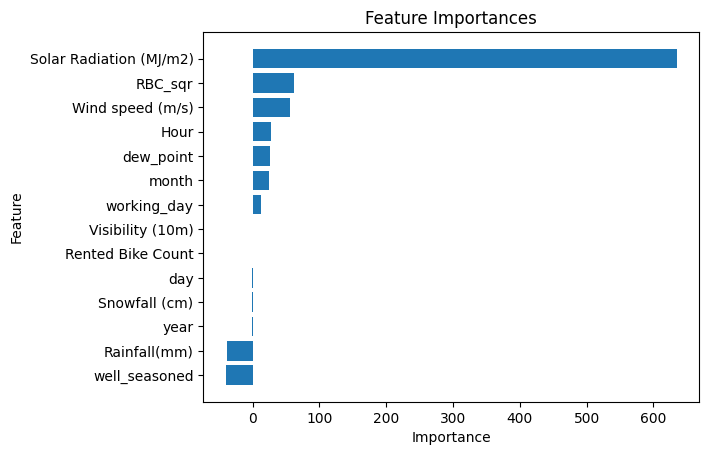

In [41]:
np.random.seed(1)
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=3)
frame(ridge_cv, X_train, X_test, y_train, y_test)
# Get the feature importances
importances3 = ridge_cv.coef_
# Sort the features by importance
location = importances3.argsort()
    
# Plot the feature importances
plt.barh(range(len(location)), importances3[location])
plt.yticks(range(len(location)), [columns_list[i] for i in location])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# ElasticNet Regression with cross-validation

---



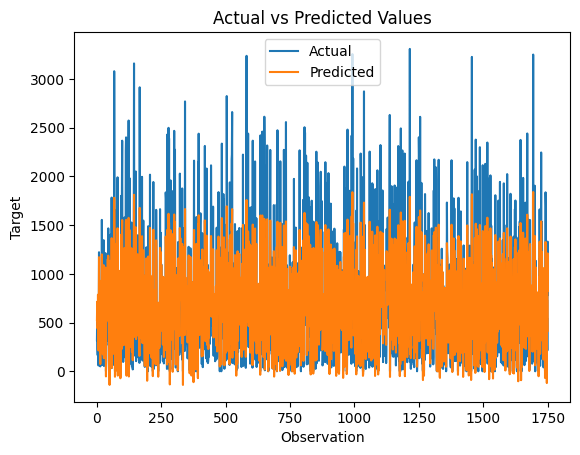

MSE_train: 74332.34304398928
MSE_test: 75476.00277667363
RMSE_train: 272.6395845140417
RMSE_test: 274.7289623914334
MAE_train: 194.639929383291
MAE_test: 196.7878049388318
R2_train: 0.820990746746273
R2_test: 0.819660862140288
Adj_R2_test: 0.8182073515300198


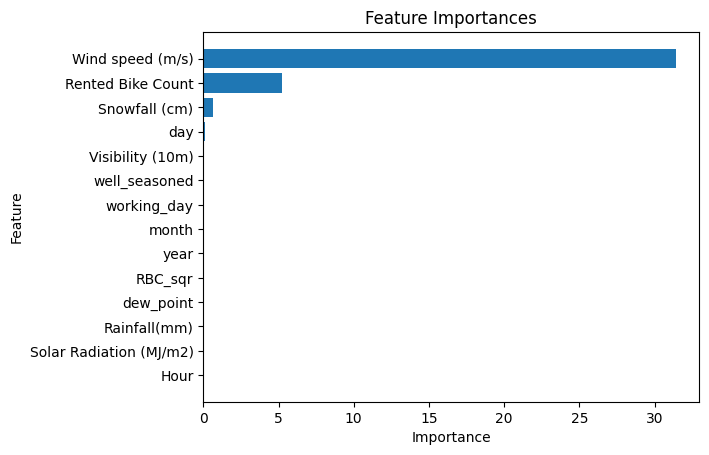

In [42]:
elastic_net_cv = ElasticNetCV(cv=3, random_state=1)
frame(elastic_net_cv,X_train, X_test, y_train, y_test )
# Get the feature importances
importances4 = elastic_net_cv.coef_
# Sort the features by importance
location = importances4.argsort()
    
# Plot the feature importances
plt.barh(range(len(location)), importances4[location])
plt.yticks(range(len(location)), [columns_list[i] for i in location])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Decision Tree Regression

---



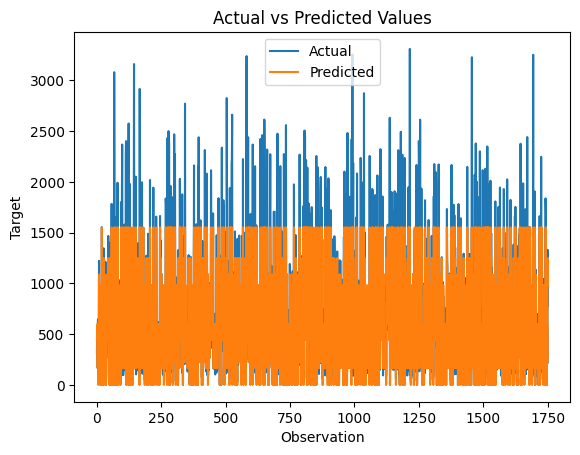

MSE_train: 49981.58561643836
MSE_test: 50024.42636986302
RMSE_train: 223.56561814473702
RMSE_test: 223.6614101043428
MAE_train: 107.66238584474885
MAE_test: 105.60673515981735
R2_train: 0.8796329302798784
R2_test: 0.8804737719065344
Adj_R2_test: 0.8795104056467138


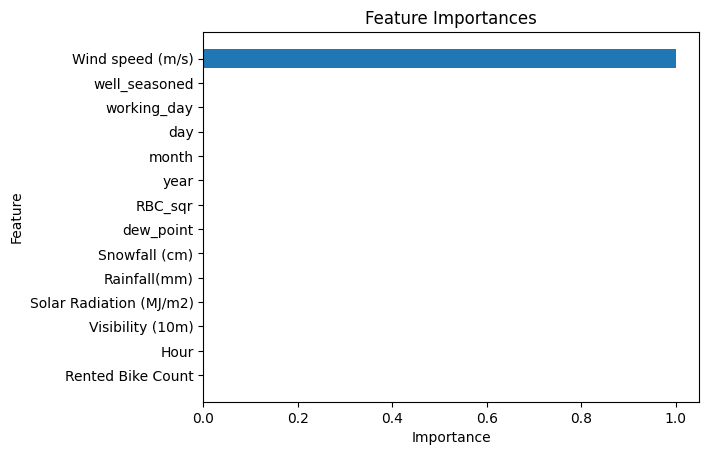

In [43]:
DTR_regressor = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=1) 
frame(DTR_regressor, X_train, X_test, y_train, y_test)
# Get the feature importances
importances5 = DTR_regressor.feature_importances_
# Sort the features by importance
location = importances5.argsort()
    
# Plot the feature importances
plt.barh(range(len(location)), importances5[location])
plt.yticks(range(len(location)), [columns_list[i] for i in location])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

We take criteria Entropy because it check the impurity, Max leaf node 10 it means it grow upto 10 leaves only and random state 0 just for comapring purpose.

# Random Forest Regression with Grid Search Cross-Validation

---



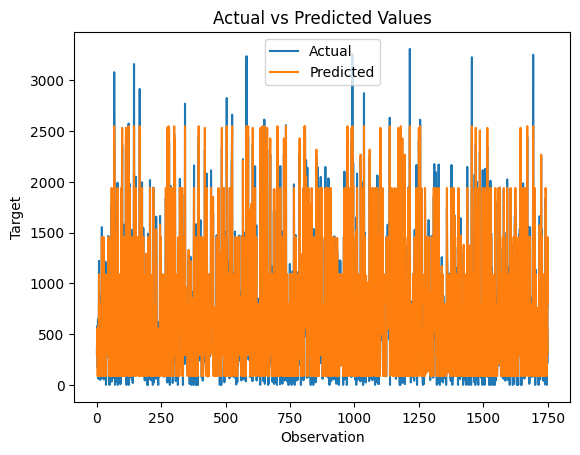

MSE_train: 7462.921219458089
MSE_test: 7523.294896094624
RMSE_train: 86.38820069580156
RMSE_test: 86.7369292521624
MAE_train: 64.11943815697266
MAE_test: 64.00104570036846
R2_train: 0.9820275818051909
R2_test: 0.9820241604548063
Adj_R2_test: 0.9818792774648047


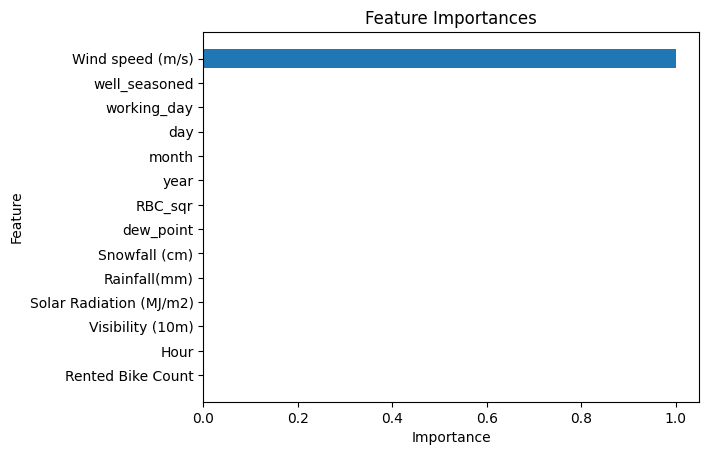

In [44]:
from pandas.core.common import random_state
np.random.seed(1)
RFR_regressor = RandomForestRegressor()
grid_values = {'n_estimators':[50,80,100], 'max_depth':[3,5,7]}
RFR_regressor = GridSearchCV(RFR_regressor, param_grid = grid_values, scoring = 'roc_auc', cv=5)
frame(RFR_regressor, X_train, X_test, y_train, y_test)
# Get the feature importances
best_model = RFR_regressor.best_estimator_    # use best estimator instead of feature here first because feature importance is not available in grid cross-validation
importances6 = best_model.feature_importances_
# Sort the features by importance
location = importances6.argsort()
    
# Plot the feature importances
plt.barh(range(len(location)), importances6[location])
plt.yticks(range(len(location)), [columns_list[i] for i in location])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# **Visualization all the Regression R2 values**
---

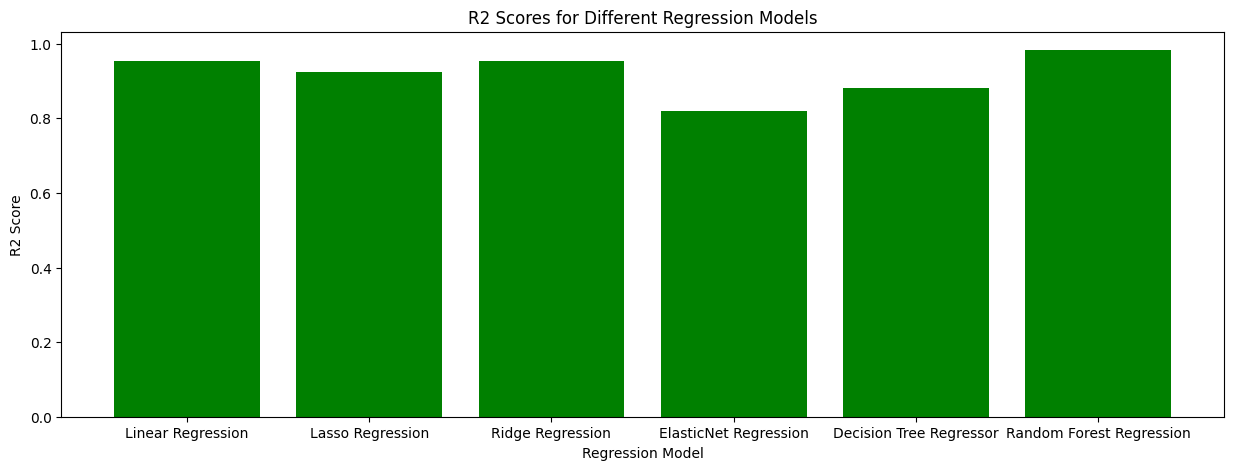

In [45]:
# Train and evaluate models
models = [regression, lasso_cv, ridge_cv, elastic_net_cv, DTR_regressor, RFR_regressor]
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'Decision Tree Regressor', 'Random Forest Regression']
r2_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# Plot R2 scores for each model
plt.figure(figsize=(15, 5))
plt.bar(model_names, r2_scores, color='green')
plt.title('R2 Scores for Different Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('R2 Score')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar graph uses horizontal bars to illustrate the information. It enables us to visualize and compare data for many categories. The advantage of bar graphs is that they are simple to read and understand. They immediately provide you with information about the provided data set.

##### 2. What is/are the insight(s) found from the chart?

1. The model that performs the best, Random Forest Regression, with an R2 score of 0.981668168270039.
2. The worst-performing model, ElasticNe Regression, with an R2 score of 0.8196626252780658.



#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, obtaining insight by comparing several regression models based on their R2 scores can have a positive impact on the company.

A company could use the top-performing model to predict the target variable more precisely and make better decisions based on the predictions. For instance, in a sales forecasting situation, a more precise projection of future sales might assist the company in more efficient planning of inventory levels, manufacturing schedules, and marketing campaigns.

Similarly to this, the business may avoid using the worst-performing model by recognizing it, possibly saving time and resources that would have been used on a model that was less accurate. This might aid the company in increasing productivity and minimizing expenses.

# **Business Objective**

---



**What do you suggest the client to achieve Business Objective ?**



To achieve the business objective, I would suggest the following steps for the client:
*  **Data Collection and Cleaning:** The initial stage involves collecting data from a variety of sources, including bike rental providers, weather reports, local events, etc., and cleaning the data by eliminating any duplicates or discrepancies.
*   **Choose Relevant factors:** Once the data has been cleansed, it is critical to choose relevant factors that might influence demand for bike sharing, such as weather conditions, time of day, day of week, and so on.
*   **Set up a Predictive Model:** The customer may then use the appropriate data to create a predictive model that can precisely estimate the demand for bike sharing. For this, a variety of machine learning methods, including decision trees, and linear regression, can be utilized.
*  **Test and improve the model:** After creating the model, it is critical to test it on a subset of the data to confirm that it appropriately predicts bike-sharing demand. If the model is underperforming, the client should improve it by changing the features or using a new algorithm.
*   **Launch and Monitor the Model:** Once the model has shown to be effective, it may be used to produce real-time predictions. However, it is critical to track the model's performance over time to ensure that it continues to appropriately estimate bike-sharing demand. As new data becomes available, the model may need to be updated on a regular basis.
*   **Take Action on Insights:** Finally, the customer should take action on the model's outcomes. For example, if the model predicts that there will be a strong demand for bike sharing at specific times or in specific areas, the client may ensure that there will be enough bikes available in those areas to satisfy the demand.











# **Conclusion**

---



# **EDA Insights**

---



*   The relationship between hour and bike count is random. Anytime is a good time to ride a bike.
*   Most frequently, 20 to 85% humidity is required for biking.
*    Mostly demand for bikes more when the wind speed is low.
*   Although we cannot identify a clear pattern in visibility, we can state that demand for bikes is often highest when visibility is best.
*   In areas with strong sun exposure, demand for bikes is often minimal.
*   When rainfall is unlikely to occur, people rent bikes.
*   Lack of demand for bikes during winter.
*   The demand for bikes is the same in the autumn, summer, and spring, but it is quite low in the winter.
*   Demand for bikes is highest on "no holiday" days and lowest on "holiday."
*   On a 'No function' day, we have very little demand.
*   Bicycle demand is typically between 0 and 20.
*   The sixth month has the biggest demand.
*   We have highest bike demand in 18th hour of the day.



# **The results of ML models**

---




*   Visualization of Actual vs. Prediction is performed for all 6 models.
*   R2 Comparisons:
       Linear Regressor R2 : 0.9538193994196074

       Lasso Regressor R2 : 0.9244548788202334

       Ridge Regressor R2 : 0.9538192431473912

       ElasticNet Regressior R2 : 0.8196626252780658

       Decision Tree Regressor R2 : 0.8804737719065344

       Random Forest Regressor R2 : 0.981668168270039

*   Random Forest Regression is the best-performing model with an R2 score of 0.981668168270039.

*   ElasticNe Regression is the worst-performing model with an R2 score of 0.8196626252780658.